# Supervised Learning - Gaussian Naive Bayes

Do you remember the recipe for Machine Learning? Let me remind you once again!

* Define Problem : We start by defining the problem we are trying to solve. This can be as simple as prediction of your next semester's result based on your previous results.
* Collect Data : Next step is to collect relevant data based on the problem definition. This can be your grades in different semesters.
* Prepare Data : The data collected for our problem is preprocessed. This can be removing redundant grades and replacing the missing ones.
* Select Model(Algorithm) : After the data is ready, we proceed to select the machine learning model. The selection is based on the problem type e.g. classification, regression etc and the data that is available to us. The model can be linear regression model in our case.
* Train Model : The selected model is then trained to learn from the data we have collected.
* Evaluate Model : Final step is to evaluate the model that we have trained for accuracy and view the results.
This is exactly what we are going to do here.

## Step 1 - Define Problem

Most of the engineering students have a dream of doing Masters in USA! But what are the chances of someone getting in? <br>
What if I told you that we can use Machine Learning to predict if you'll get an admission or not? <br>
How cool is that? <br>

<img src="files/img.gif">

## Step 2 - Collect & Prepare Data
Step 2.1 - Import Libs, Data & Primary Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv("data.csv")

In [2]:
df.head()

,admit,gre,gpa,rank
0,0,NaN,NaN,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.shape

(400, 4)

In [4]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,372.000000,364.000000,400.00000
mean,0.317500,601.236559,3.410797,2.48500
std,0.466087,108.095884,0.378461,0.94446
min,0.000000,220.000000,2.420000,1.00000
25%,0.000000,520.000000,3.140000,2.00000
50%,0.000000,600.000000,3.430000,2.00000
75%,1.000000,680.000000,3.700000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Here are the few references that can be made from this -
* Average GPA is 3.38
* GRE has a max score of 800
* There are about 400 records

## Step 2.2 - Finding & Imputing Missing Values

In [5]:
df.isnull().sum()

admit     0
gre      28
gpa      36
rank      0
dtype: int64

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 1:3])
df.iloc[:, 1:3] = imputer.transform(df.iloc[:, 1:3])

In [7]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

Awesome! Now we don't have any missing values.

## Step 2.3 - Data Visualization

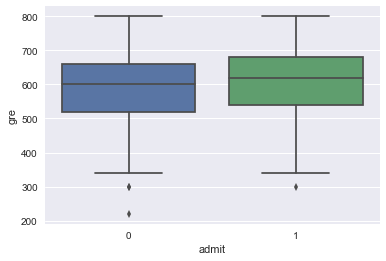

In [8]:
sns.boxplot(x = 'admit', y = 'gre', data = df)

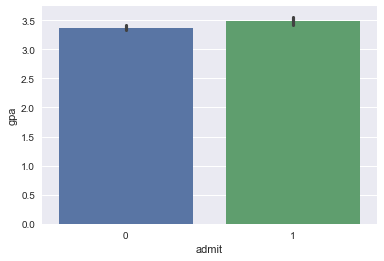

In [9]:
sns.barplot(x = 'admit', y = 'gpa', data = df)

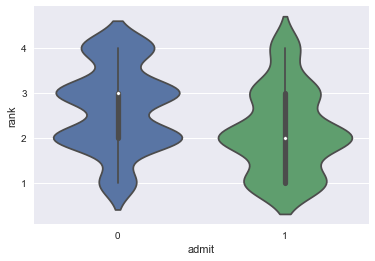

In [10]:
sns.violinplot(x = 'admit', y = 'rank', data = df)

## Step 3 - Modeling

In [11]:
#convert dataframe into matrix
dataArray = df.values

In [12]:
#splitting input features & o/p vars
X = dataArray[:,1:4]
y = dataArray[:,0:1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [14]:
X_train.shape

(200, 3)

In [15]:
X_test.shape

(200, 3)

In [16]:
from sklearn.naive_bayes import GaussianNB
GNBClassifier = GaussianNB()
GNBClassifier = GNBClassifier.fit(X_train, y_train.ravel())
y_pred = GNBClassifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)*100
result

70.0